In [ ]:
# Going to learn about the basics of Pytorch
# Resource i am using for this : https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html#

In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

In [ ]:
import torch
print("Using torch", torch.__version__)

In [ ]:
# A very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.
torch.manual_seed(42)

**Tensors** - PyTorch's version of NumPy arrays, but GPU-ready:

In [ ]:
# Creating Tensors
x = torch.tensor([1,2,3])
y = torch.tensor([[1,2],[3,4]])
z = torch.tensor([[1,2,3],[4,5,6]])
u = torch.rand(3,4) # Tensor with random values uniformly sampled between 0 and 1
p = torch.randn(3,4) # Tensor with random values sampled from a normal distribution with mean 0 and variance 1
q = torch.zeros(2,3)

# Printing Tensors
print(x)
print(y)
print(z)
print(u)
print(p)
print(q)

In [ ]:
r = torch.tensor([[1,2],[8,6]]); # Infers int64 from integers
t = torch.Tensor([[1,2],[8,6]]); # Forces float32

print(r)
print(t)

In [ ]:
# Creates a 4D tensor with random values b/w 0 and 1.
# The use case i can see it this or can visulize the 4D tensor like this

# Shape: (batch_size, channels, height, width)
batch_of_images = torch.rand(32, 3, 224, 224)
# - 32 images in the batch
# - 3 color channels (RGB)
# - 224x224 pixel resolution

print(batch_of_images)
print("Shape : ", batch_of_images.shape)

Tensor to Numpy, and Numpy to Tensor

Quick reference:

**tensor.numpy()** - fast, shared memory

**tensor.detach().numpy()** - safe with gradients

**torch.from_numpy(array)** - fast, shared memory

**torch.tensor(array)** - safe, creates copy


In [ ]:
# Create 3x3 numpy array [0-8] and reshape from 1D to 2D
np_arr = np.arange(9).reshape(3,3)  # [[0,1,2],[3,4,5],[6,7,8]]

# Convert to tensor - SHARES memory with numpy array
tensor = torch.from_numpy(np_arr)

# Convert to tensor - COPIES data (independent)
tensor2 = torch.tensor(np_arr)

# Modify original numpy array
np_arr[0,0] = 96

# Modify shared tensor (affects numpy array too!)
tensor[1][1] = 69

print("Numpy array: \n",np_arr)      # Shows both changes: 96 and 69
print("Pytorch tensor: \n",tensor)   # Shows both changes: 96 and 69
print("Pytorch tensor: \n",tensor2)  # Shows ONLY original values [0-8]

# Key: from_numpy() = shared memory, tensor() = separate copy

In [ ]:
# To transform a PyTorch tensor back to a numpy array, we can use the function .numpy() on tensors:

tensor3 = torch.arange(4).reshape(2,2)
num_array2 = tensor3.numpy()

print(num_array2)

**Operations**

In [ ]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)
y = x1 + x2

print("x1 : \n", x1)
print("x2 : \n" , x2)

x2.add_(x1)
print("y : \n" , y) # Creates a new vector containing the sum of two inputs.
print("x2 : \n" , x2) # in-place Operation, changed the value of x2

In [ ]:
x = torch.arange(6)
print("view():", x.view(2, 3))
print("reshape():", x.reshape(2, 3))

# But this shows the difference
x = torch.arange(12).view(3, 4).t()  # transpose makes non-contiguous
# x.view(2, 6)     # Would fail
x.reshape(2, 6)    # Works fine


# KEY DIFFERENCE:
# view() = fails on non-contiguous tensors, guaranteed memory sharing
# reshape() = always works, may copy data

# WHEN TO USE:
# view() → when you know tensor is contiguous & need speed
# reshape() → when unsure or working with sliced/transposed tensors

In [ ]:
x = torch.arange(6).view(2,3)
y = torch.arange(6).view(3,2)

h = torch.matmul(x,y)
print("Matrix multiplication \n: ", h)

**Indexing** : Situation where we need to select a part of a tensor.

In [ ]:
x = torch.arange(12).view(3,4)

print(x)

In [ ]:
# Row slicing
print(x[0:2])         # First 2 rows
print(x[1:])          # From row 1 to end
print(x[::2])         # Every 2nd row

# Column slicing
print(x[:, 1:3])      # All rows, columns 1-2
print(x[:, ::2])      # All rows, every 2nd column

# Combined slicing
print(x[1:3, 0:2])    # Rows 1-2, columns 0-1

**Dynamic Computation Graph and Backpropagation**

---
PyTorch is a define-by-run framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

The only thing we have to do is to compute the output, and then we can ask PyTorch to automatically get the gradients.



**Note**: Why do we want gradients? Consider that we have defined a function, a neural net, that is supposed to compute a certain output
 for an input vector
. We then define an error measure that tells us how wrong our network is; how bad it is in predicting output
 from input
. Based on this error measure, we can use the gradients to update the weights
 that were responsible for the output, so that the next time we present input
 to our network, the output will be closer to what we want.

In [ ]:
# The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.
x = torch.ones(3,3)
print(x.requires_grad)

We can change this for an existing tensor using the function requires_grad_() (underscore indicating that this is a in-place operation)

Alternatively, when creating a tensor, you can pass the argument requires_grad=True to most initializers we have seen above.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

In [ ]:
# going to create an example function

x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X : ",x)


In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()

print(y)

Need to check about the gradient part

**THE MODEL**


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

**nn.Module** : It is the base class for all neural network components in PyTorch. Think of it as a "building block" - everything from a single layer to an entire network inherits from it.

__ init __ : "What layers do I have?"

**forward**: "How does data flow through them?"

**Calling model(x)**: Automatically runs forward(x) + tracks gradients

We just define the forward pass, PyTorch handles the backward pass automatically!

In [ ]:
# Template
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module / We create the Parameters of Module (using nn.Parameter)

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

**We Will make a input layer, one hidden layer with tanh as activation function, and a output layer.**

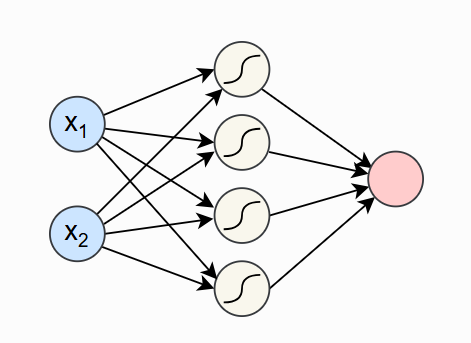

In [ ]:
class SimpleClassifier(nn.Module):

  def __init__(self, num_inputs, num_hidden, num_outputs):
    super().__init__()
    # Initialize the modules we need to build the network
    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.act_fn = nn.Tanh()
    self.linear2 = nn.Linear(num_hidden, num_outputs)

  def forward(self,x):
    # Perform the calculation of the model to determine the predection
    x = self.linear1(x)
    x = self.act_fn(x)
    x = self.linear2(x)
    return x


In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

In [ ]:
# named_parameters() returns (name, parameter) pairs for all learnable weights
for name, param in model.named_parameters():
  print(f"Parameter {name}, Shape {param.shape}")

# Each linear layer has a weight matrix of the shape [output, input], and a bias of the shape [output].

**Loss Modules**

**Binary Cross Entropy (BCE)**

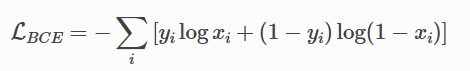

In [ ]:
loss_module = nn.BCEWithLogitsLoss() # It combines a sigmoid layer and the BCE loss in a single class.


**torch.optim.SGD** Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss).

In [27]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# torch.optim that has most popular optimizers implemented.

**Saving a model**

we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called state_dict from the model which contains all learnable parameters.

state_dict = model.state_dict()
print(state_dict)

To save the state dictionary, we can use torch.save

torch.save(object, filename).

For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")


**Evaluation**

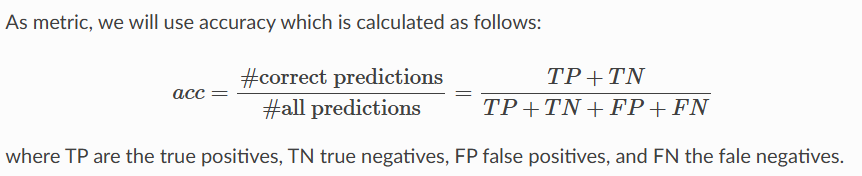

**uffffff, finally done with the bloggggg, i skipped some topics but will them in the path, thanks if u read this :)**